In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv('telcom_data.csv')

In [4]:
data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [6]:
data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
# Calculate User's engagement metrics using following concept
# 1.Session Frequency
# 2.The duration of the session
# 3.The session total traffic (download and upload (bytes))
data['Sessions Frequency'] = data.groupby('MSISDN/Number')['Bearer Id'].transform('count')
data['Duration Of Session'] = data['Dur. (ms)']
data['Session Total Traffic']= data['Total UL (Bytes)'] + data['Total DL (Bytes)']

In [8]:
data['Sessions Frequency'] 

0         2.0
1         2.0
2         1.0
3         1.0
4         1.0
         ... 
149996    1.0
149997    2.0
149998    1.0
149999    1.0
150000    NaN
Name: Sessions Frequency, Length: 150001, dtype: float64

<AxesSubplot:>

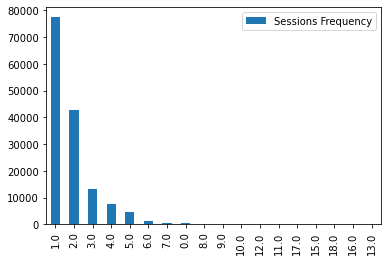

In [9]:
data['Sessions Frequency'].value_counts().plot(kind='bar',legend=True)

In [10]:
data['Duration Of Session']

0         1823652.0
1         1365104.0
2         1361762.0
3         1321509.0
4         1089009.0
            ...    
149996      81230.0
149997      97970.0
149998      98249.0
149999      97910.0
150000          NaN
Name: Duration Of Session, Length: 150001, dtype: float64

<AxesSubplot:xlabel='Duration Of Session', ylabel='Density'>

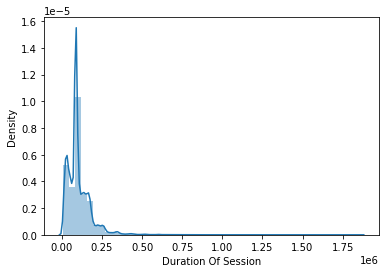

In [11]:
sns.distplot(data['Duration Of Session'])

In [12]:
data['Session Total Traffic']

0         345629377.0
1         707185356.0
2         307690973.0
3         889352748.0
4         607681403.0
             ...     
149996    631804110.0
149997    705783925.0
149998    627698629.0
149999    401522016.0
150000            NaN
Name: Session Total Traffic, Length: 150001, dtype: float64

<AxesSubplot:>

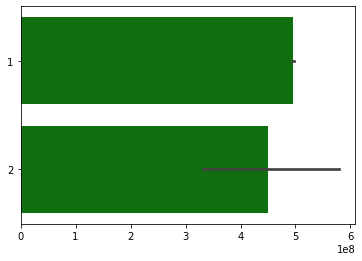

In [13]:
sns.barplot(x=data["Session Total Traffic"].value_counts().index,
            y=data["Session Total Traffic"].value_counts().values,color ="green",orient="h")

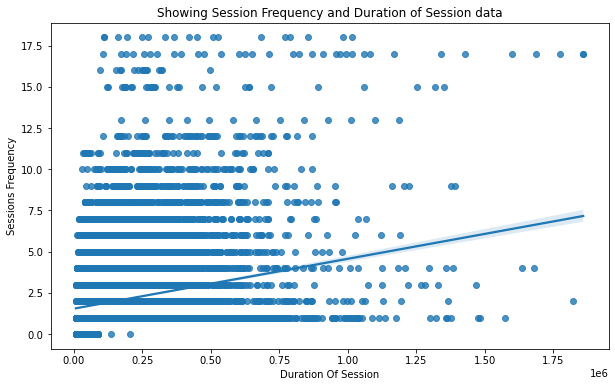

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data=data,y="Sessions Frequency",x="Duration Of Session").set(title="Showing Session Frequency and Duration of Session data")
plt.show()

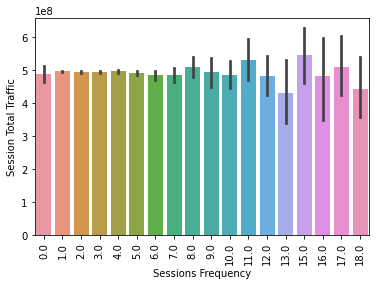

In [15]:
sns.barplot(x=data['Sessions Frequency'],y=data['Session Total Traffic'])
plt.xticks(rotation='vertical')
plt.show()

# Task 2.1

1.Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric.

2.Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement.

3.Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

4.Aggregate user total traffic per application and derive the top 10 most engaged users per application.

5.Plot the top 3 most used applications using appropriate charts.
6.Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:

7.What is the optimized value of k (use the elbow method for this)?

8.Interpret your findings.

In [16]:
# 1.Aggregate the metrics per customer id (MSISDN)
metrix_data= data.groupby('MSISDN/Number').agg({'Sessions Frequency':'sum',
                                                  'Duration Of Session':'sum',
                                                  'Session Total Traffic':'sum'})
metrix_data

,Sessions Frequency,Duration Of Session,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,1.0,116720.0,8.786906e+08
3.360100e+10,1.0,181230.0,1.568596e+08
3.360100e+10,1.0,134969.0,5.959665e+08
3.360101e+10,1.0,49878.0,4.223207e+08
3.360101e+10,4.0,37104.0,1.457411e+09
...,...,...,...
3.379000e+10,1.0,8810.0,7.146416e+08
3.379000e+10,1.0,140988.0,4.803073e+08
3.197021e+12,1.0,877385.0,2.321240e+08


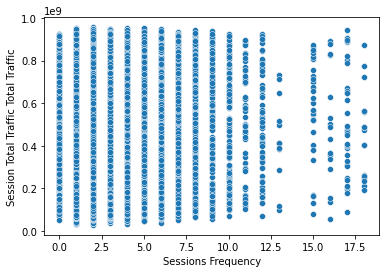

In [17]:
#lets plot duration and total traffic
import seaborn as sns


sns.scatterplot(x='Sessions Frequency',y='Session Total Traffic',data=data)
plt.xlabel('Sessions Frequency')
plt.ylabel('Session Total Traffic Total Traffic')
plt.show()

In [18]:
#The top 10 customers per engagement metric
top_10_Sessions_Frequency =metrix_data.sort_values('Sessions Frequency',ascending=False).head(10)
top_10_Duration_Of_Session =metrix_data.sort_values('Duration Of Session', ascending=False).head(10)
top_10_Session_Total_Traffic = metrix_data.sort_values('Session Total Traffic', ascending=False).head(10)
top_10_Sessions_Frequency

,Sessions Frequency,Duration Of Session,Session Total Traffic
MSISDN/Number,,,
3.362632e+10,324.0,8791927.0,7.971167e+09
3.361489e+10,289.0,9966898.0,8.846226e+09
3.362578e+10,289.0,18553754.0,8.499621e+09
3.365973e+10,256.0,4035428.0,7.705863e+09
3.376054e+10,225.0,9279434.0,8.514774e+09
3.367588e+10,225.0,4865947.0,7.891111e+09
3.366716e+10,169.0,8744914.0,5.618394e+09
3.360452e+10,144.0,5207990.0,5.487855e+09
3.378632e+10,144.0,4059652.0,5.622232e+09


In [19]:
Session_data= data.groupby('MSISDN/Number').agg({'Sessions Frequency':'sum'})

In [20]:
#Top 10 customers per engagement metric.
# top 10 Sessions Frequency
top_10_Sessions_Frequency =Session_data.sort_values('Sessions Frequency',ascending=False).head(10)
top_10_Sessions_Frequency

,Sessions Frequency
MSISDN/Number,
3.362632e+10,324.0
3.361489e+10,289.0
3.362578e+10,289.0
3.365973e+10,256.0
3.376054e+10,225.0
3.367588e+10,225.0
3.366716e+10,169.0
3.360452e+10,144.0
3.378632e+10,144.0


<AxesSubplot:xlabel='Sessions Frequency', ylabel='Density'>

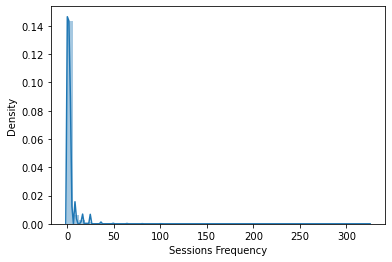

In [21]:
sns.distplot(Session_data['Sessions Frequency'])

<AxesSubplot:>

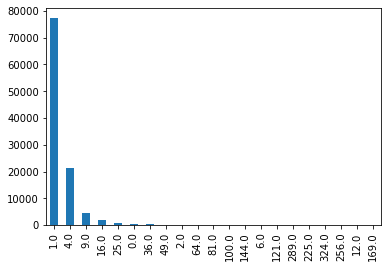

In [22]:
Session_data['Sessions Frequency'].value_counts().plot(kind='bar')

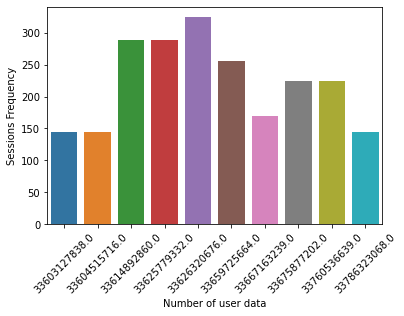

In [23]:
# assuming the index of thetop_10_Sessions_Frequency DataFrame contains the user identifiers
x = top_10_Sessions_Frequency.index
y = top_10_Sessions_Frequency['Sessions Frequency']

sns.barplot(x=x, y=y)
plt.xlabel('Number of user data')
plt.ylabel('Sessions Frequency')
plt.xticks(rotation=45)
plt.show()


In [24]:
Duration_data= data.groupby('MSISDN/Number').agg({'Duration Of Session':'sum'})

In [25]:
top_10_Duration_Of_Session =Duration_data.sort_values('Duration Of Session', ascending=False).head(10)
top_10_Duration_Of_Session

,Duration Of Session
MSISDN/Number,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366284e+10,6614270.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0


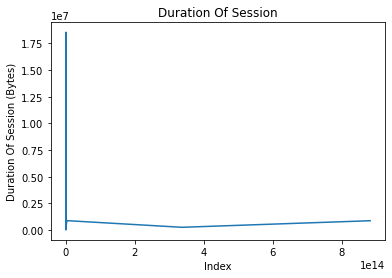

In [26]:
plt.plot(Duration_data['Duration Of Session'])
plt.title('Duration Of Session')
plt.xlabel('Index')
plt.ylabel('Duration Of Session (Bytes)')
plt.show()


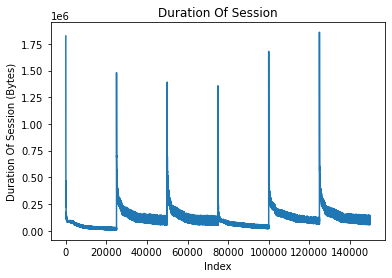

In [27]:
plt.plot(data['Duration Of Session'])
plt.title('Duration Of Session')
plt.xlabel('Index')
plt.ylabel('Duration Of Session (Bytes)')
plt.show()


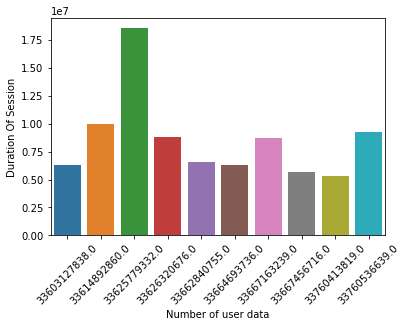

In [28]:
# assuming the index of top_10_Duration_Of_Session DataFrame contains the user identifiers
x = top_10_Duration_Of_Session.index
y = top_10_Duration_Of_Session['Duration Of Session']

sns.barplot(x=x, y=y)
plt.xlabel('Number of user data')
plt.ylabel('Duration Of Session')
plt.xticks(rotation=45)
plt.show()


In [29]:
Traffic_data= data.groupby('MSISDN/Number').agg({'Session Total Traffic':'sum'})

In [30]:
top_10_Session_Total_Traffic = Traffic_data.sort_values('Session Total Traffic', ascending=False).head(10)
top_10_Session_Total_Traffic

,Session Total Traffic
MSISDN/Number,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


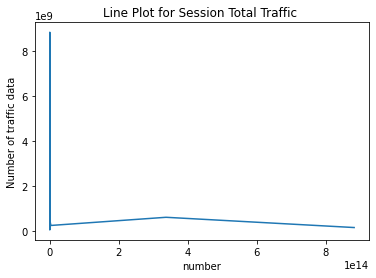

In [31]:
plt.plot(Traffic_data.index,Traffic_data.values)
plt.xlabel('number')
plt.ylabel('Number of traffic data')
plt.title('Line Plot for Session Total Traffic ')
plt.show()

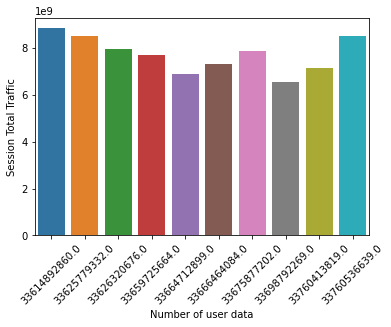

In [32]:
# assuming the index oftop_10_Session_Total_Traffic DataFrame contains the user identifiers
x = top_10_Session_Total_Traffic.index
y = top_10_Session_Total_Traffic['Session Total Traffic']

sns.barplot(x=x, y=y)
plt.xlabel('Number of user data')
plt.ylabel('Session Total Traffic')
plt.xticks(rotation=45)
plt.show()

In [33]:
#2 Normalize the engagement metrics
Scaler = StandardScaler()
normalized_data = pd.DataFrame(Scaler.fit_transform(metrix_data), columns=metrix_data.columns, index=metrix_data.index)
normalized_data

,Sessions Frequency,Duration Of Session,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,-0.321123,-0.158014,0.382297
3.360100e+10,-0.321123,0.188148,-1.087666
3.360100e+10,-0.321123,-0.060090,-0.193453
3.360101e+10,-0.321123,-0.516690,-0.547071
3.360101e+10,0.285601,-0.585235,1.560825
...,...,...,...
3.379000e+10,-0.321123,-0.737061,0.048222
3.379000e+10,-0.321123,-0.027791,-0.428985
3.197021e+12,-0.321123,3.923731,-0.934395


In [34]:
# Aggregate the metrics per customer ID
aggregated_data = data.groupby('MSISDN/Number').agg({
    'Sessions Frequency': 'mean',
    'Duration Of Session': 'sum',
    'Session Total Traffic': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Gaming DL (Bytes)':'sum',
    'Gaming UL (Bytes)':'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
})

In [35]:
# Report the top 10 customers per engagement metric
top_10_frequency = aggregated_data.nlargest(10, 'Sessions Frequency')
top_10_duration = aggregated_data.nlargest(10, 'Duration Of Session')
top_10_traffic = aggregated_data.nlargest(10, 'Session Total Traffic')
top_10_social_media = aggregated_data.nlargest(10, 'Social Media DL (Bytes)')
top_10_google = aggregated_data.nlargest(10, 'Google DL (Bytes)')
top_10_email = aggregated_data.nlargest(10, 'Email DL (Bytes)')
top_10_youtube = aggregated_data.nlargest(10, 'Youtube DL (Bytes)')
top_10_netflix = aggregated_data.nlargest(10, 'Netflix DL (Bytes)')
top_10_gaming = aggregated_data.nlargest(10, 'Gaming DL (Bytes)')
top_10_other = aggregated_data.nlargest(10, 'Other DL (Bytes)')

In [36]:
# Print the results
print("Top 10 Customers by Session Frequency:")
print(top_10_Sessions_Frequency)
print("\nTop 10 Customers by Session Duration:")
print(top_10_Duration_Of_Session)
print("\nTop 10 Customers by Total Traffic:")
print(top_10_Session_Total_Traffic)
print("\nTop 10 Customers by Social Media Usage:")
print(top_10_social_media)
print("\nTop 10 Customers by Google Usage:")
print(top_10_google)
print("\nTop 10 Customers by Email Usage:")
print(top_10_email)
print("\nTop 10 Customers by YouTube Usage:")
print(top_10_youtube)
print("\nTop 10 Customers by Netflix Usage:")
print(top_10_netflix)
print("\nTop 10 Customers by Gaming Usage:")
print(top_10_gaming)
print("\nTop 10 Customers by Other Data Usage:")
print(top_10_other)

Top 10 Customers by Session Frequency:
               Sessions Frequency
MSISDN/Number                    
3.362632e+10                324.0
3.361489e+10                289.0
3.362578e+10                289.0
3.365973e+10                256.0
3.376054e+10                225.0
3.367588e+10                225.0
3.366716e+10                169.0
3.360452e+10                144.0
3.378632e+10                144.0
3.360313e+10                144.0

Top 10 Customers by Session Duration:
               Duration Of Session
MSISDN/Number                     
3.362578e+10            18553754.0
3.361489e+10             9966898.0
3.376054e+10             9279434.0
3.362632e+10             8791927.0
3.366716e+10             8744914.0
3.366284e+10             6614270.0
3.366469e+10             6288730.0
3.360313e+10             6287761.0
3.366746e+10             5649882.0
3.376041e+10             5321667.0

Top 10 Customers by Total Traffic:
               Session Total Traffic
MSISDN/Number        

In [37]:
#Run a k-means (k=3) to classify customers into three groups of engagement.
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
metrix_data['cluster'] = kmeans.labels_

In [38]:
#3 Compute the minimum, maximum, average & total non-normalized metrics for each cluster.
cluster_metrics =metrix_data.groupby('cluster').agg(['min', 'max', 'mean', 'sum'])

In [39]:
#4 Aggregate user total traffic per application and derive the top 10 most engaged users per 
columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
               'Google DL (Bytes)', 'Google UL (Bytes)', 
               'Email DL (Bytes)', 'Email UL (Bytes)', 
               'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
               'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 
               'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
               'Other DL (Bytes)', 'Other UL (Bytes)']
traffic = data.groupby('MSISDN/Number')[columns].sum()
traffic['total_traffic'] = traffic.sum(axis=1)
traffic

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic
MSISDN/Number,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,1.255788e+09
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,4.364173e+08
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,1.091053e+09
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.475687e+08
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,2.235055e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,1.006033e+09
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,6.849434e+08
3.197021e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,6.998021e+08


In [40]:
traffic['total_traffic']

MSISDN/Number
3.360100e+10    1.255788e+09
3.360100e+10    4.364173e+08
3.360100e+10    1.091053e+09
3.360101e+10    4.475687e+08
3.360101e+10    2.235055e+09
                    ...     
3.379000e+10    1.006033e+09
3.379000e+10    6.849434e+08
3.197021e+12    6.998021e+08
3.370000e+14    7.406419e+08
8.823971e+14    5.283134e+08
Name: total_traffic, Length: 106856, dtype: float64

In [41]:
#5. Plot the top 3 most used applications using appropriate charts.
# Derive the top 10 most engaged users per application
top_10_per_app = {}
for app in columns:
    top_10_per_app[app] = traffic.sort_values(app, ascending=False).head(10)
top_10_per_app[app] 
   

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic
MSISDN/Number,,,,,,,,,,,,,,,
3.362578e+10,26564121.0,571379.0,107904739.0,34403176.0,31895412.0,8738554.0,237883033.0,215075736.0,193912238.0,163068369.0,7.171884e+09,154789688.0,6.201653e+09,152930478.0,1.470127e+10
3.361489e+10,27749744.0,544800.0,93941708.0,34032079.0,33607211.0,7181423.0,199823443.0,194546775.0,179585986.0,181815060.0,7.622035e+09,127396833.0,7.495298e+09,143966031.0,1.634152e+10
3.362632e+10,42743837.0,630942.0,116106455.0,36085397.0,33404785.0,9013997.0,164048706.0,210434341.0,199479238.0,129246502.0,6.745734e+09,141838597.0,8.025477e+09,142400945.0,1.599664e+10
3.365973e+10,34900444.0,511914.0,90958549.0,25557796.0,29907647.0,6092145.0,119658146.0,138332942.0,196277206.0,203241873.0,6.609900e+09,115658741.0,6.182551e+09,134864910.0,1.388841e+10
3.367588e+10,18655364.0,567557.0,83002994.0,26857508.0,24284723.0,7229698.0,158665235.0,158745337.0,161626462.0,147466697.0,6.863307e+09,107260559.0,6.665074e+09,133441436.0,1.455618e+10
3.376054e+10,39297646.0,485543.0,88626532.0,34596567.0,26437895.0,7255872.0,194068298.0,202220900.0,146500839.0,188142430.0,7.316364e+09,144681056.0,4.590038e+09,126096213.0,1.310481e+10
3.376041e+10,20515774.0,261431.0,56331853.0,26406867.0,21791296.0,3785669.0,174245981.0,128923126.0,167023809.0,151323737.0,6.170943e+09,97676681.0,3.988504e+09,113141379.0,1.112087e+10
3.366471e+10,19035729.0,354870.0,64946017.0,25443355.0,15213560.0,6212447.0,153074482.0,123759531.0,134941569.0,116857240.0,6.013562e+09,90293610.0,3.868637e+09,108323400.0,1.074066e+10
3.365836e+10,16865613.0,420146.0,58671984.0,17835154.0,17553922.0,2128126.0,119379568.0,141610278.0,131358936.0,132783142.0,5.628473e+09,77446285.0,4.905779e+09,107871346.0,1.135818e+10


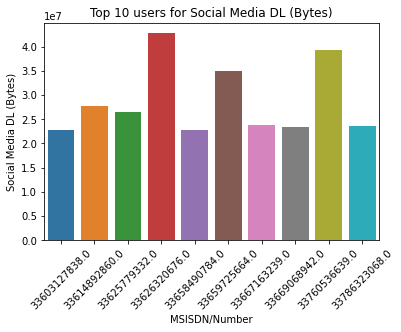

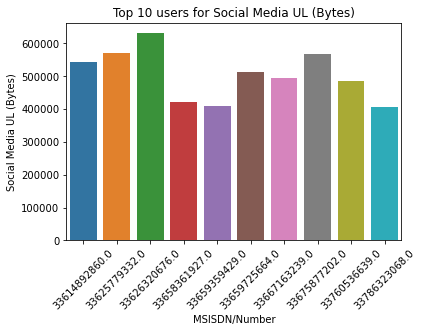

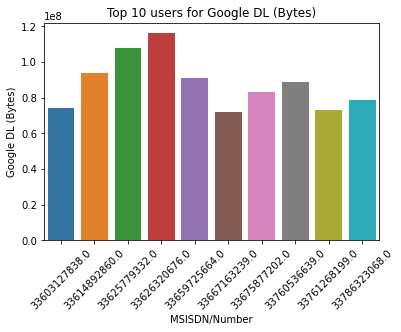

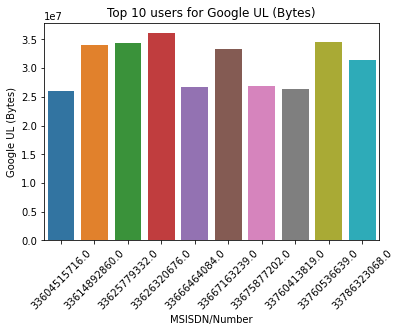

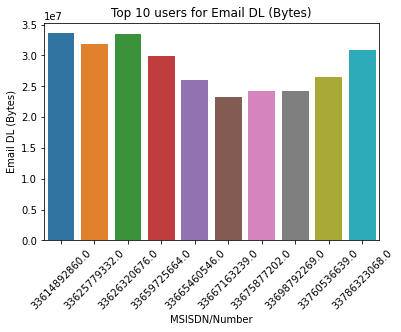

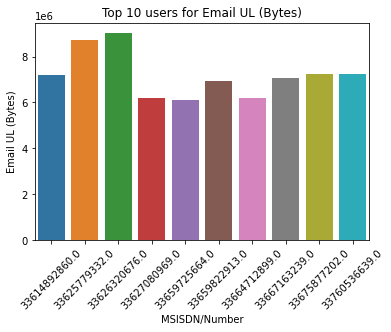

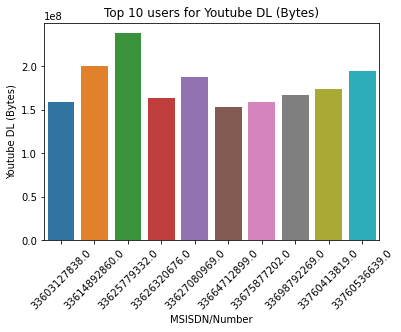

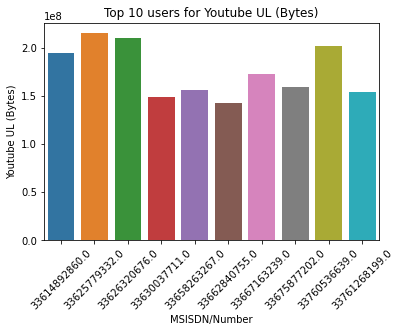

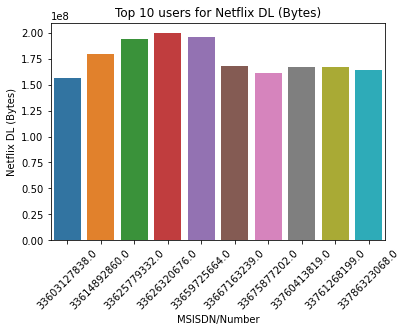

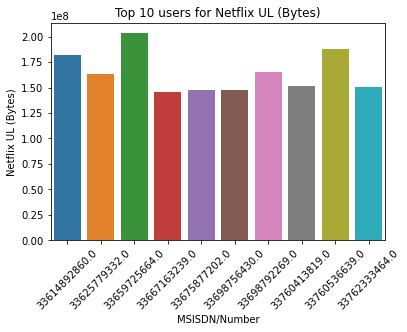

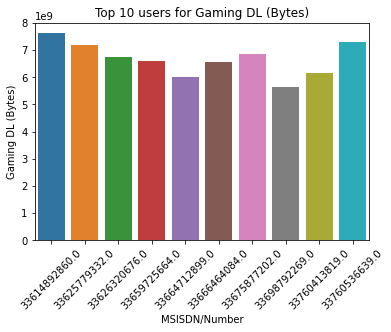

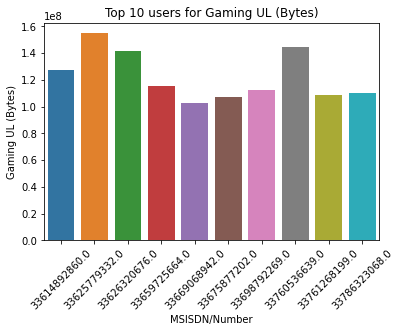

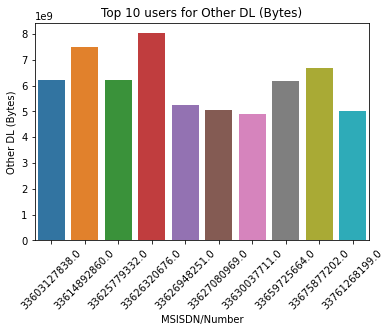

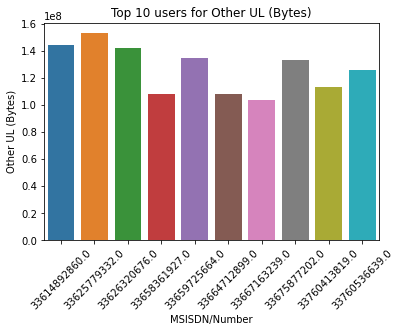

In [42]:
top_10_per_app = {}
for app in columns:
    top_10_per_app[app] = traffic.sort_values(app, ascending=False).head(10)

# Plot the results using Seaborn
for app, data in top_10_per_app.items():
    sns.barplot(x=data.index, y=app, data=data)
    plt.title(f'Top 10 users for {app}')
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:>

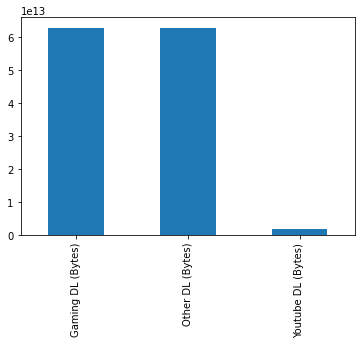

In [43]:
# Plot the top 3 most used applications
top_3_apps = traffic[columns].sum().sort_values(ascending=False).head(3)
top_3_apps.plot(kind='bar')


In [44]:
# 6 Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:
# What is the optimized value of k (use the elbow method for this)?
# Interpret your findings.


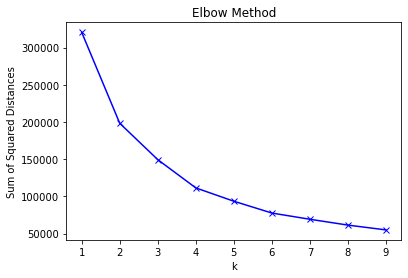

In [45]:
k_values = range(1, 10)# Define the range of k values to test
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=3)
    kmeans.fit(normalized_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


In [46]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_data)
metrix_data['cluster']=kmeans.labels_
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
cluster_labels = kmeans.labels_
traffic['Engagement cluster'] =cluster_labels

# Calculate cluster statistics
cluster_stats = traffic.groupby('Engagement cluster')[columns].agg(['min','max','mean','sum'])
print(cluster_stats)
cluster_std = traffic.groupby('Engagement cluster')[columns].std()


                   Social Media DL (Bytes)                            \
                                       min         max          mean   
Engagement cluster                                                     
0                                     12.0  10158122.0  2.142563e+06   
1                                  40546.0  17764631.0  5.499160e+06   
2                                4218122.0  42743837.0  1.349628e+07   

                                 Social Media UL (Bytes)            \
                             sum                     min       max   
Engagement cluster                                                   
0                   2.054396e+11                     0.0  179839.0   
1                   5.923695e+10                   474.0  339786.0   
2                   2.685759e+09                 93015.0  630942.0   

                                                Google DL (Bytes)  \
                             mean           sum               min   
Engageme

In [48]:
df=pd.DataFrame(cluster_stats )

In [49]:
df

Social Media DL (Bytes)                            \
                                       min         max          mean   
Engagement cluster                                                     
0                                     12.0  10158122.0  2.142563e+06   
1                                  40546.0  17764631.0  5.499160e+06   
2                                4218122.0  42743837.0  1.349628e+07   

                                 Social Media UL (Bytes)            \
                             sum                     min       max   
Engagement cluster                                                   
0                   2.054396e+11                     0.0  179839.0   
1                   5.923695e+10                   474.0  339786.0   
2                   2.685759e+09                 93015.0  630942.0   

                                                Google DL (Bytes)  \
                             mean           sum               min   
Engagement cluster                                                  
0                    39292.839308  3.767594e+09             207.0   
1                   100792.178333  1.085733e+09           47434.0   
2                   250595.688442  4.986854e+07        16213993.0   

                                 ... Gaming UL (Bytes)                \
                            max  ...              mean           sum   
Engagement cluster               ...                                   
0                    30598331.0  ...      9.888892e+06  9.481964e+11   
1                    57406640.0  ...      2.541987e+07  2.738228e+11   
2                   116106455.0  ...      6.289305e+07  1.251572e+10   

                   Other DL (Bytes)                                            \
                                min           max          mean           sum   
Engagement cluster                                                              
0                      3.290000e+03  2.287457e+09  5.026500e+08  4.819660e+13   
1                      4.343361e+06  4.154212e+09  1.290805e+09  1.390455e+13   
2                      1.152770e+09  8.025477e+09  3.127797e+09  6.224316e+11   

                   Other UL (Bytes)                                           
                                min          max          mean           sum  
Engagement cluster                                                            
0                             156.0   43923469.0  9.853130e+06  9.447673e+11  
1                          502368.0   81540805.0  2.537480e+07  2.733373e+11  
2                        15656028.0  152930478.0  6.318298e+07  1.257341e+10  

[3 rows x 56 columns]

In [50]:
b=pd.DataFrame(traffic)

In [51]:
b

,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),total_traffic,Engagement cluster
MSISDN/Number,,,,,,,,,,,,,,,,
3.360100e+10,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,1.255788e+09,0
3.360100e+10,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,4.364173e+08,0
3.360100e+10,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,1.091053e+09,0
3.360101e+10,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.475687e+08,0
3.360101e+10,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,2.235055e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,234320.0,65863.0,6834178.0,697091.0,480946.0,525969.0,8294310.0,18353533.0,14754741.0,147797.0,6.573267e+08,3034642.0,291391283.0,3891534.0,1.006033e+09,0
3.379000e+10,442214.0,56355.0,1472406.0,3957299.0,2513433.0,664.0,5596862.0,14254710.0,6929961.0,1601099.0,4.276202e+08,9383076.0,204636073.0,6479040.0,6.849434e+08,0
3.197021e+12,668596.0,46628.0,8572779.0,1865881.0,842279.0,678492.0,9839889.0,2120016.0,10340908.0,16251392.0,1.645636e+08,13485133.0,467678100.0,2848373.0,6.998021e+08,0
